<a href="https://colab.research.google.com/github/Piyusha1211/MEC_20F20679/blob/main/Face_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install face-recognition==1.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=31e3dab7dec0c4b4c696e48ba64cd672c80f9e60d61da462ecb1c1824ab2ee3f
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
!pip install opencv-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#base libraries for data handling
import os
import sys
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# consistent plots #
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [7]:
#load the data -- > .npz format
data = np.load('/content/ORL_faces.npz')

In [8]:
#check the type of the data
type(data)

numpy.lib.npyio.NpzFile

In [9]:
#check the content of the files in a sorted fashion.. 
sorted(data.files)

['testX', 'testY', 'trainX', 'trainY']

In [10]:
#view the content of the npzfiles
data['trainX']

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [11]:
data['trainY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [12]:
#check the type of the data -- > confirm it is numpy array
type(data['trainX']), type(data['trainY'])

(numpy.ndarray, numpy.ndarray)

In [13]:
#check the shape of the data
data['trainX'].shape, data['trainY'].shape

((240, 10304), (240,))

In [14]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

#trainX = data['trainX']
#testX = data['testX']

#trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['trainX']))))/255.
#testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['testX']))))/255.

#trainX =  np.reshape(trainX,newshape=(trainX.shape[0],n_rows,n_cols,3))
#testX =  np.reshape(testX,newshape=(testX.shape[0],n_rows,n_cols,3))

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols))

trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(trainX))))/255.
testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(testX))))/255.


trainY = data['trainY']
testY = data['testY']

In [15]:
#check the new shape
trainX.shape, testX.shape

((240, 112, 92, 3), (160, 112, 92, 3))

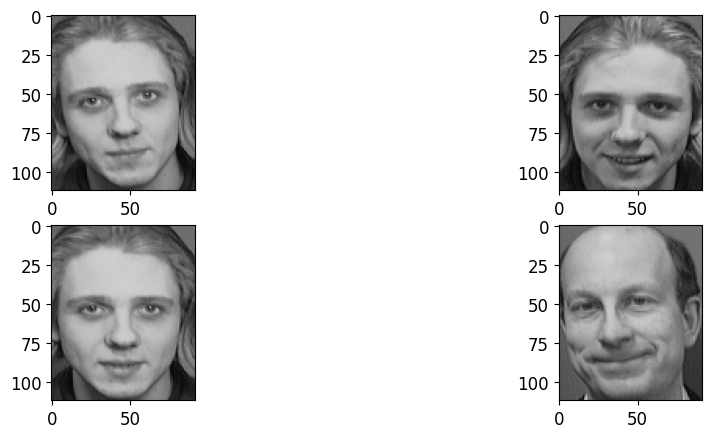

In [16]:
#lets visualize random images
delta = 5
n = np.random.randint(low=0,high=trainX.shape[0]- 2*delta,dtype=int)

#plot the faces 
plt.subplot(2,2,1)
plt.imshow(trainX[n])
plt.subplot(2,2,2)
plt.imshow(trainX[n+delta])
plt.subplot(2,2,3)
plt.imshow(trainX[n-delta])
plt.subplot(2,2,4)
plt.imshow(trainX[n+delta*2])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,random_state=seed,test_size=test_size)

In [18]:
#shape post split of data
X_train.shape, X_valid.shape

((216, 112, 92, 3), (24, 112, 92, 3))

In [19]:
#for consitency in the variable names
X_test = testX

In [20]:
y_test = testY

In [21]:
y_train[0]

4

In [22]:
!pip install keras_facenet
from keras_facenet import FaceNet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.4 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=6c6d623d3c72ae86a2dfa995510bc5307920e3f391ac1456fa9e0be17631ed1b
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [23]:
#load the pretrained facenet model
from keras.models import load_model
from numpy import asarray
from numpy import expand_dims

model =  FaceNet()

In [24]:
#repeat the same color channels 3 times to make the shape compatible with the facenet model
#X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
#X_valid = np.repeat(X_valid[..., np.newaxis], 3, -1)
#X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [25]:
X_train.shape

(216, 112, 92, 3)

In [26]:
#resize the array to make it compatible with facenet. 
X_train = np.resize(X_train,(X_train.shape[0],160,160,3))
X_valid = np.resize(X_train,(X_valid.shape[0],160,160,3))
X_test = np.resize(X_train,(X_test.shape[0],160,160,3))

In [27]:
#check the new shapes after array resize
X_train.shape, X_valid.shape, X_test.shape

((216, 160, 160, 3), (24, 160, 160, 3), (160, 160, 160, 3))

In [28]:
#scale the inputs
#X_train = X_train / 255.
#X_valid = X_valid / 255.
#X_test = X_test / 255.

In [29]:
#use the pretrained model to generate the embeddings 
y_train_embeddings = model.embeddings(X_train)
y_valid_embeddings = model.embeddings(X_valid)
y_test_embeddings = model.embeddings(X_test)

5/5 [==============================] - 9s 2s/step


In [30]:
#check the shape of the embeddings of the images in the training set 
y_train_embeddings.shape

(216, 512)

In [31]:
#apply the L2 norm on the generated embeddings using facenet model
from sklearn.preprocessing import Normalizer
input_encoder = Normalizer(norm='l2')
embed_train_norm = input_encoder.transform(np.reshape(y_train_embeddings,(-1,128)))
embed_valid_norm = input_encoder.transform(np.reshape(y_valid_embeddings,(-1,128)))
embed_test_norm = input_encoder.transform(np.reshape(y_test_embeddings,(-1,128)))

In [32]:
#check the shape post normalization 
embed_train_norm.shape

(864, 128)

In [33]:
#import the needed libraries and metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols,n_channels))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols,n_channels))
trainY = data['trainY']
testY = data['testY']

In [36]:
#train the model on the entire train data after shuffling the dataset 
shuffled_indices = np.random.permutation(len(trainX))
X_train = trainX[shuffled_indices]
y_train = trainY[shuffled_indices]

In [37]:
#optional familiar variable naming 
X_test = testX
y_test = testY

In [38]:
#tensorflow
import tensorflow as tf

In [39]:
def convolutional_model(input_shape,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)):
    
    '''CNN and Dense Model using Functional API'''
    
    input_img = tf.keras.Input(shape=input_shape[1:])
    #Conv2D layer
    Z1 = tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),strides=strides,padding=padding)(input_img)
    ##ReLU activation layer
    A1 = tf.keras.layers.Activation(activation)(Z1)
    ##MAXPOOL
    P1 = tf.keras.layers.MaxPool2D(pool_size=(n_filters,n_filters),strides=strides*8,padding=padding)(A1)
    ##Conv2D
    Z2 = tf.keras.layers.Conv2D(filters=n_filters*2,kernel_size=(int(kernel_size/2),int(kernel_size/2)),strides=strides,padding=padding)(P1)
    ##ReLU
    A2 = tf.keras.layers.Activation(activation)(Z2)
    ##MAXPool
    P2 = tf.keras.layers.MaxPool2D(pool_size=(int(n_filters/2)),strides=strides*4,padding=padding)(A2)
    ##Flatten
    F = tf.keras.layers.Flatten()(P2)
    ##Dense layers
    D1 = tf.keras.layers.Dense(units=units,activation=activation)(F)
    D2 = tf.keras.layers.Dense(units=int(units/2),activation=activation,kernel_regularizer=kernel_regularizer)(D1)
    D3 = tf.keras.layers.Dense(units=int(units/4),activation=activation,kernel_regularizer=kernel_regularizer)(D2)
    ##output layer
    outputs = tf.keras.layers.Dense(units=20,activation='softmax')(D3)
    
    #instantiate the model
    model = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model    

In [40]:
#set the shape and the regularizer to be applied
INPUT_SHAPE = (X_train.shape[0],112,92,1)
kernel_regularizer = tf.keras.regularizers.L2(l2=0.05)

#call the convolutional model 
conv_model = convolutional_model(input_shape=INPUT_SHAPE,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                                kernel_regularizer=kernel_regularizer)
#compile the model
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 92, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 112, 92, 8)        136       
                                                                 
 activation (Activation)     (None, 112, 92, 8)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 12, 16)        528       
                                                                 
 activation_1 (Activation)   (None, 14, 12, 16)        0         
                                                             

In [41]:
class MyQualityThreshold(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyQualityThreshold, self).__init__()
        self.cl = cl
  
    def on_epoch_end(self,epoch,logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']

        if testScore > self.cl:
              self.model.stop_training=True

In [42]:
#fit the model
history = conv_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=2,
                        callbacks=[MyQualityThreshold(0.92)],batch_size=32)

Epoch 1/100
8/8 - 3s - loss: 74.7857 - accuracy: 0.0583 - val_loss: 61.9101 - val_accuracy: 0.0688 - 3s/epoch - 337ms/step
Epoch 2/100
8/8 - 1s - loss: 51.3242 - accuracy: 0.0625 - val_loss: 40.1795 - val_accuracy: 0.1063 - 1s/epoch - 157ms/step
Epoch 3/100
8/8 - 1s - loss: 35.8792 - accuracy: 0.1667 - val_loss: 31.4699 - val_accuracy: 0.1250 - 1s/epoch - 154ms/step
Epoch 4/100
8/8 - 2s - loss: 29.4808 - accuracy: 0.1708 - val_loss: 26.9653 - val_accuracy: 0.2937 - 2s/epoch - 212ms/step
Epoch 5/100
8/8 - 2s - loss: 25.5310 - accuracy: 0.3750 - val_loss: 23.7296 - val_accuracy: 0.3812 - 2s/epoch - 292ms/step
Epoch 6/100
8/8 - 2s - loss: 22.5374 - accuracy: 0.6083 - val_loss: 21.2366 - val_accuracy: 0.5375 - 2s/epoch - 233ms/step
Epoch 7/100
8/8 - 2s - loss: 20.2299 - accuracy: 0.7083 - val_loss: 19.3598 - val_accuracy: 0.6938 - 2s/epoch - 209ms/step
Epoch 8/100
8/8 - 1s - loss: 18.5724 - accuracy: 0.8208 - val_loss: 18.1550 - val_accuracy: 0.6500 - 1s/epoch - 141ms/step
Epoch 9/100
8/8 

In [43]:
#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,74.785690,0.058333,61.910114,0.06875
1,51.324242,0.062500,40.179546,0.10625
2,35.879166,0.166667,31.469950,0.12500
3,29.480822,0.170833,26.965307,0.29375
4,25.531010,0.375000,23.729610,0.38125


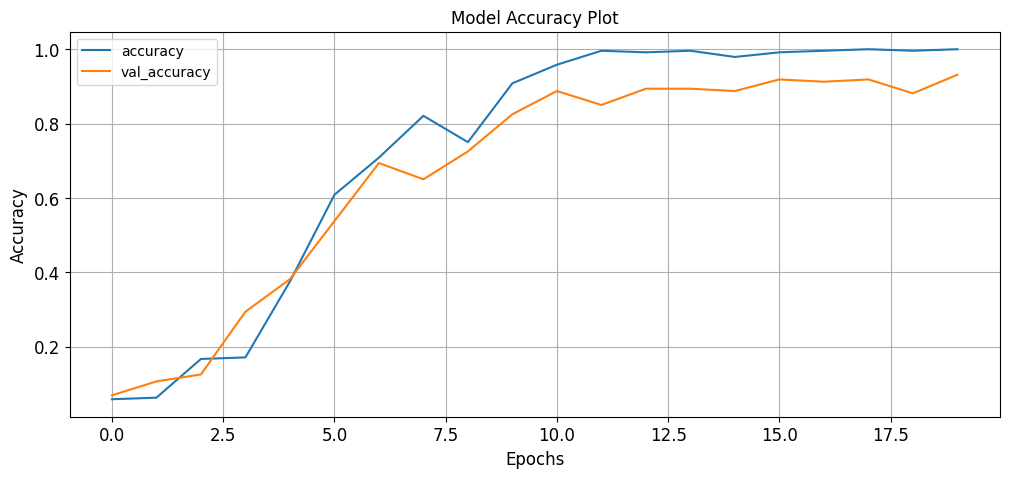

In [44]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

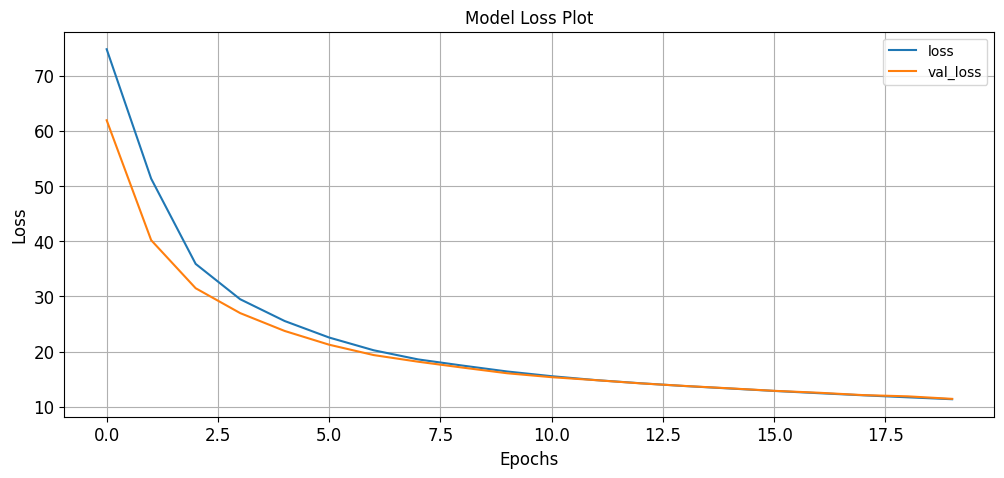

In [45]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()